In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#os.chdir('C:\\Users\Matthew\...')
path = os.getcwd()

In [2]:
advertising = pd.read_csv('Advertising.csv')

In [3]:
print(advertising.head())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [4]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


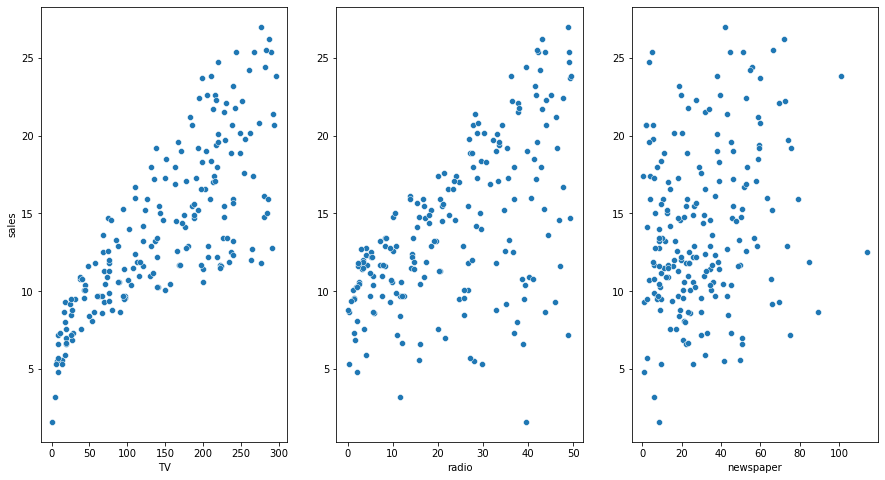

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,8))
sns.scatterplot(x = "TV", y = "sales", data = advertising, ax = ax1)
sns.scatterplot(x = "radio", y = "sales", data = advertising, ax = ax2)
sns.scatterplot(x = "newspaper", y = "sales", data = advertising, ax = ax3)
ax2.set_ylabel("")
ax3.set_ylabel("")
plt.show()

In [6]:
advertising["investment"] = advertising["TV"] + advertising['radio'] + advertising['newspaper']

<AxesSubplot:xlabel='investment', ylabel='sales'>

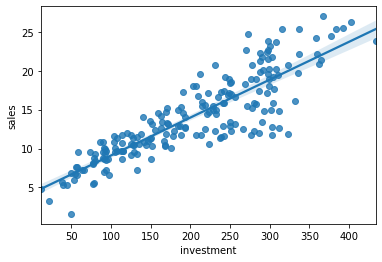

In [7]:
sns.regplot(x = "investment", y = "sales", data = advertising)

<AxesSubplot:xlabel='TV', ylabel='sales'>

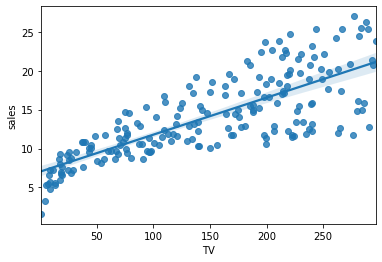

In [8]:
sns.regplot(x = "TV", y = "sales", data = advertising)

In [9]:
advertising.head()

,TV,radio,newspaper,sales,investment
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [10]:
advertising = advertising.drop("investment", axis = 1)
#we won't be using investment

In [11]:
#X is our list of features (all but sales)
X = advertising.drop("sales", axis=1)

In [12]:
y = advertising["sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [13]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [16]:
#We see the row numbers are being pulled randomly - 150, 159, 182 etc
X_train.head(10)

,TV,radio,newspaper
150,280.7,13.9,37.0
159,131.7,18.4,34.6
182,56.2,5.7,29.7
185,205.0,45.1,19.6
193,166.8,42.0,3.6
27,240.1,16.7,22.9
192,17.2,4.1,31.6
167,206.8,5.2,19.4
104,238.2,34.3,5.3
197,177.0,9.3,6.4


In [17]:
#Other 40% of rows
X_test.head(10)

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [18]:
y_test.head() #Respective rows for the test values

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [19]:
y_train.head() #Respective rows for the train data

150    16.1
159    12.9
182     8.7
185    22.6
193    19.6
Name: sales, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
estimator = LinearRegression()

In [22]:
estimator.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = estimator.predict(X_test) #Will create y_test^

In [24]:
y_pred  #These are the prediction values for X_test inputs

array([15.53656741, 19.53142151, 11.47083621, 16.82786227,  9.07821837,
        7.00890339, 20.2133207 , 17.24329528,  9.86962295, 19.14106047,
       12.21152226, 13.88243268, 13.82438918, 21.11964682, 18.38071211,
        9.90769552, 15.66502054,  7.77873776,  7.58245851, 20.28161857,
        7.75087684, 18.10772094, 24.50397625, 22.70208401,  7.99883634,
       12.78258013, 21.38336105,  8.11372762, 12.47396494, 12.35613555,
       10.70076197, 19.17220163, 10.14195484,  6.74494887, 17.22848977,
        7.89043836,  9.29450845,  8.34336468, 10.45877941, 10.72553771,
       12.99946253,  9.89042202, 10.25396492,  8.04257745, 11.4926688 ,
       10.04746948,  8.87246982, 16.31823817, 13.34716972, 20.64797502,
       12.36138909, 14.04675632, 17.63253865, 11.13790619, 12.67675282,
        5.51046988, 23.09323285, 12.41584736, 18.73843755, 15.16969055,
       15.28169568, 23.95488471,  6.83375737, 19.81065308, 14.02959842,
       21.13874287, 15.46071789, 15.21155543, 15.60777053, 16.85

In [25]:
y_test.head() #These are the actual values

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
#Calculate the loss functions based on the test predictions and the real values 
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [29]:
MAE

1.2958083354169354

In [30]:
MSE

2.5446351972642893

In [31]:
RMSE

1.5951912729401103

In [32]:
advertising['sales'].mean()

14.022500000000003